In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from pyarrow import table

import volpy_func_lib as vp
import volpy_func_ticker_lib as vtp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy

importlib.reload(vtp)
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)

import os
os.makedirs("figures/summary", exist_ok=True)

# Summary tables

In [2]:
importlib.reload(vtp)
importlib.reload(table_lib)

sum_df = vtp.concat_ticker_datasets(vp.All_tickers, "sum1")

scale = 0.6
ticker_list_list = [vp.VIX_tickers, vp.Cross_AM_tickers, vp.OEX_tickers, vp.Liquid_tickers, vp.DJX_tickers]
name_list = ["VIX", "Cross-AM", "OEX", "Liquid", "DJX"]

# ticker_list_list = [vp.Liquid_tickers]
# name_list = ["Liquid"]

for ticker_list, name in zip(ticker_list_list, name_list):
    df = sum_df[sum_df["ticker"].isin(ticker_list)]
    _ = table_lib.table_dataset_list_strike_count_pages(df, name = name, width_scale=scale)

Skipped 2/237 tickers: ['RUT', 'INDU']


# Liquid top 42

In [13]:
sum_df = vtp.concat_ticker_datasets(vp.OEX_tickers, "sum1")
df = table_lib.table_dataset_list_strike_count(sum_df, name = "OEX", width_scale=scale)
df = df[df["N"]>8*252]
Liquid_stock_tickers_ = df[df["ticker"] != "OEX"]["ticker"][:42]
Liquid_stock_tickers_ = Liquid_stock_tickers_.to_numpy()
Liquid_stock_tickers_

array(['GOOG', 'BKNG', 'TSLA', 'GOOGL', 'AMZN', 'META', 'NFLX', 'PYPL',
       'MA', 'AAPL', 'AVGO', 'CHTR', 'NVDA', 'CRM', 'ABBV', 'V', 'GS',
       'BLK', 'GM', 'PM', 'BA', 'TMUS', 'MSFT', 'PARA', 'ADBE', 'DE',
       'BIIB', 'DIS', 'JPM', 'CAT', 'OXY', 'COST', 'MET', 'ACN', 'COF',
       'IBM', 'GILD', 'C', 'QCOM', 'UNH', 'CVS', 'WFC'], dtype=object)

In [14]:
len(Liquid_stock_tickers_)

42

# Summary visualizations

In [76]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from pyarrow import table

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy
import volpy_func_ticker_lib as vtp

importlib.reload(vtp)
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)



D:\Professionelt\Code\volpy\table_lib.py:1089: SyntaxWarning: invalid escape sequence '\s'


<module 'vol_strat_lib' from 'D:\\Professionelt\\Code\\volpy\\vol_strat_lib.py'>

In [77]:
df = vtp.concat_ticker_datasets(["SPX"], "sum1")
df = df.set_index('date')

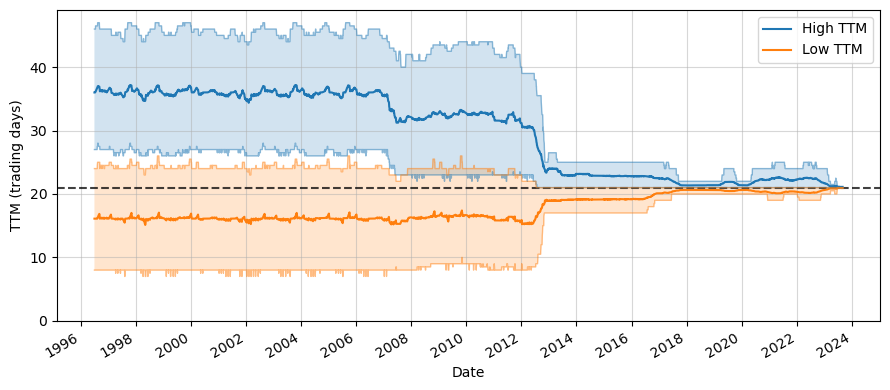

In [78]:
importlib.reload(vp)
vp.plot_timeseries_with_pct(df, alpha = 0.1, var = "days", var_name = "TTM (trading days)", figsize = (9,4), savefig=True)

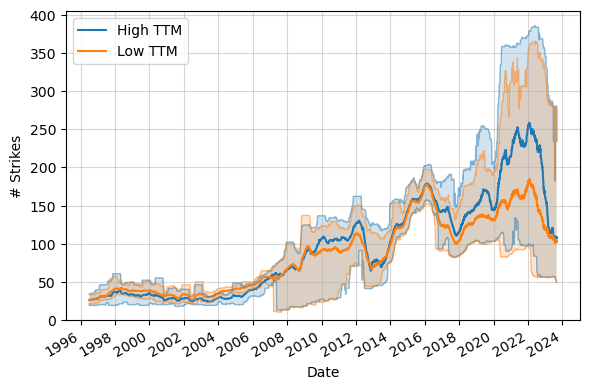

In [79]:
vp.plot_timeseries_with_pct(df, alpha = 0.1, var = "#K", var_name = "# Strikes", figsize = (6,4), savefig=True)

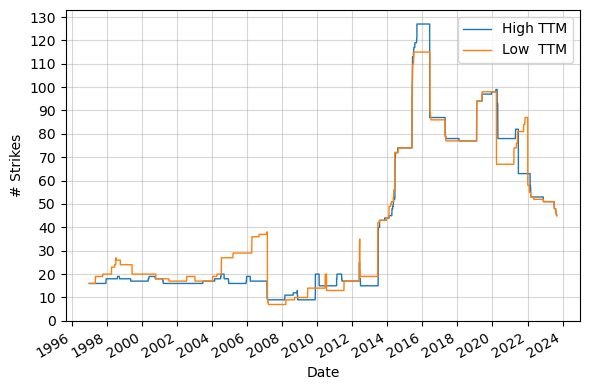

In [80]:
vp.plot_lowest_number_of_strikes_timeseries(df, figsize = (6,4), savefig=True)

# Overlap of datasets

In [21]:
def overlap(list1, list2):
    """
    Return the common elements of two lists.
    """
    return list(set(list1) & set(list2))

def difference(list1, list2):
    """
    Return elements in list1 that are not in list2.
    """
    return list(set(list1) - set(list2))

In [30]:
overlap(["CEW"], vp.All_tickers)

['CEW']

In [23]:
len(set(vp.All_tickers))

237

In [6]:
list(set(vp.DJX_tickers) - set(vp.OEX_tickers))

['GT', 'UK', 'TRV', 'DJX', 'SHW']

In [7]:
vp.OEX_tickers

['OEX',
 'OEF',
 'NSM',
 'G',
 'DOW_chem',
 'DD_eidp',
 'LU',
 'MEDI',
 'EMC',
 'CCU',
 'UBAN',
 'HCA',
 'ONE',
 'S_sears',
 'T_old',
 'PHA',
 'AGC',
 'MAY',
 'AA',
 'AEP',
 'AES',
 'AIG',
 'AMGN',
 'ATI',
 'AVP',
 'AXP',
 'BA',
 'BAC',
 'BAX',
 'BBWI',
 'BDK',
 'BHGE',
 'BMY',
 'BNI',
 'C',
 'CGP',
 'CI',
 'CL',
 'CPB',
 'DXC',
 'CSCO',
 'DAL',
 'DIS',
 'EK',
 'ENE',
 'ETR',
 'EXC',
 'F',
 'FDX',
 'GX',
 'GD',
 'GE',
 'HAL',
 'HD',
 'HET',
 'HIG',
 'HNZ',
 'HON',
 'HPQ',
 'HSH',
 'IBM',
 'INTC',
 'IP',
 'JCI',
 'JNJ',
 'JPM',
 'KO',
 'LEH',
 'MCD',
 'MER',
 'MMM',
 'MRK',
 'MS',
 'MSFT',
 'NT',
 'NSC',
 'NXTL',
 'OMX',
 'ORCL',
 'PARA',
 'PEP',
 'PFE',
 'PG',
 'RAL',
 'ROK',
 'RSH',
 'RTN',
 'RTX',
 'SLB',
 'SO',
 'TOY',
 'TWX',
 'TXN',
 'UIS',
 'VZ',
 'WFC',
 'WMB',
 'WMT',
 'WY',
 'XOM',
 'XRX',
 'EP',
 'USB',
 'T',
 'BUD',
 'MDT',
 'MO',
 'GS',
 'ALL',
 'DELL',
 'CMCSA',
 'S',
 'ABT',
 'CAT',
 'TGT',
 'CVX',
 'UPS',
 'WB',
 'COF',
 'COP',
 'GOOGL',
 'RF',
 'CVS',
 'AAPL',
 'MDLZ',


In [ ]:

# assuming your lists are named VIX_tickers and ALL_tickers:
common_tickers = overlap(vp.VIX_tickers, vp.Cross_AM_tickers+vp.OEX_tickers+vp.Liquid_tickers)
print(f"Overlap ({len(common_tickers)}):", common_tickers)


# usage
not_in_vix = difference(vp.Liquid_tickers, vp.Cross_AM_tickers+vp.OEX_tickers+vp.VIX_tickers)
print(f"{len(not_in_vix)} tickers not in VIX:", not_in_vix)

In [2]:
vtp.find_missing_tickers(vp.OEX_tickers)

['AGN',
 'AVP',
 'BDK',
 'BHI',
 'CELG',
 'CGP',
 'CMCSK',
 'COV',
 'CSC',
 'EMC',
 'ENE',
 'EP',
 'GBLX',
 'HET',
 'HNZ',
 'HSH',
 'LEH',
 'MAY',
 'MON',
 'NT',
 'NXTL',
 'NYX',
 'OMX',
 'ONE',
 'PNU',
 'RAL',
 'RSH',
 'RTN',
 'SGP',
 'TOY',
 'UBAN']

# Other

In [69]:
importlib.reload(vtp)
importlib.reload(table_lib)

sum_df = vtp.concat_ticker_datasets(vp.OEX_tickers, "sum1")
table_lib.table_dataset_list_strike_count_pages(sum_df, name = "OEX", width_scale=scale)

Skipped 32/181 tickers: ['OEX', 'AGN', 'AVP', 'BDK', 'BHI', 'CELG', 'CGP', 'CMCSK', 'COV', 'CSC', 'EMC', 'ENE', 'EP', 'GBLX', 'HET', 'HNZ', 'HSH', 'LEH', 'MAY', 'MON', 'NT', 'NXTL', 'NYX', 'OMX', 'ONE', 'PNU', 'RAL', 'RSH', 'RTN', 'SGP', 'TOY', 'UBAN']


,No.,ticker,Starting_date,Ending_date,N,NK,Q1_K,Q5_K,Q10_K
0,1,GOOG,03-Apr-2014,31-Aug-2023,2369,85.417265,32.000,38.0,41.5
1,2,BKNG,08-Jul-1999,31-Aug-2023,5251,69.977052,3.000,4.0,4.5
2,3,TSLA,08-Jul-2010,31-Aug-2023,3311,66.995772,10.000,14.5,18.5
3,4,GOOGL,27-Aug-2004,31-Aug-2023,4786,66.197137,18.425,25.0,29.0
4,5,AMZN,20-Nov-1997,31-Aug-2023,6439,56.855645,4.000,5.5,7.0
...,...,...,...,...,...,...,...,...,...
144,145,BNI,09-Jan-1996,10-Feb-2010,1844,6.032538,3.000,3.0,3.5
145,146,AES,16-May-1996,31-Aug-2023,3201,5.777570,3.000,3.0,3.5
146,147,WYE,04-Jan-1996,14-Oct-2009,2802,5.699679,3.000,3.5,3.5
147,148,GTX,14-Nov-2018,16-Jun-2022,118,3.961864,3.000,3.0,3.0


In [128]:
tickers = df["ticker"][:42].to_numpy()      # gives a 1D array of length 42
tickers

array(['GOOG', 'BKNG', 'TSLA', 'GOOGL', 'AMZN', 'META', 'NFLX', 'MA',
       'PYPL', 'AAPL', 'AVGO', 'CHTR', 'NVDA', 'CRM', 'ABBV', 'HCA', 'V',
       'GS', 'WB', 'GM', 'PM', 'MSFT', 'PARA', 'BA', 'ADBE', 'TMUS',
       'OXY', 'MET', 'DE', 'DAL', 'BIIB', 'JPM', 'CAT', 'DIS', 'COST',
       'COF', 'IBM', 'QCOM', 'GILD', 'ACN', 'UNH', 'C'], dtype=object)